In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv('output_data11.csv')


In [14]:
data.head(50)

,nct_id,first_date,facility_name,city,investigator,investigator_role,sponsor_name,downcase_name,description
0,NCT06165614,2023-11-21,Lumumba Sub-County Hospital,Kisumu,"Jackton Omoto, MD",Principal Investigator,UNC Lineberger Comprehensive Cancer Center,precancerous conditions,"(29577050,NCT06165614,""Despite being preventab..."
1,NCT06165614,2023-11-21,Lumumba Sub-County Hospital,Kisumu,"Jackton Omoto, MD",Principal Investigator,UNC Lineberger Comprehensive Cancer Center,cervix neoplasm,"(29577050,NCT06165614,""Despite being preventab..."
2,NCT06165614,2023-11-21,Lumumba Sub-County Hospital,Kisumu,"Jackton Omoto, MD",Principal Investigator,Gilead Sciences,cervix neoplasm,"(29577050,NCT06165614,""Despite being preventab..."
3,NCT06165614,2023-11-21,Lumumba Sub-County Hospital,Kisumu,"Jackton Omoto, MD",Principal Investigator,Gilead Sciences,cervix cancer,"(29577050,NCT06165614,""Despite being preventab..."
4,NCT06165614,2023-11-21,Lumumba Sub-County Hospital,Kisumu,"Jackton Omoto, MD",Principal Investigator,UNC Lineberger Comprehensive Cancer Center,cervical precancer,"(29577050,NCT06165614,""Despite being preventab..."
5,NCT06165614,2023-11-21,Lumumba Sub-County Hospital,Kisumu,"Jackton Omoto, MD",Principal Investigator,UNC Lineberger Comprehensive Cancer Center,cervix cancer,"(29577050,NCT06165614,""Despite being preventab..."
6,NCT06165614,2023-11-21,Lumumba Sub-County Hospital,Kisumu,"Jackton Omoto, MD",Principal Investigator,Gilead Sciences,cervical precancer,"(29577050,NCT06165614,""Despite being preventab..."
7,NCT06165614,2023-11-21,Lumumba Sub-County Hospital,Kisumu,"Jackton Omoto, MD",Principal Investigator,Gilead Sciences,precancerous conditions,"(29577050,NCT06165614,""Despite being preventab..."
8,NCT06085105,2023-10-04,Upper East and North East regions health facil...,Navrongo,"Linnet Ongeri, MBChB, MMed",Principal Investigator,Kenya Medical Research Institute,mental health issue,"(29488292,NCT06085105,""Poor person-centered ma..."
9,NCT06085105,2023-10-04,Migori and Homabay Counties health facilities,Migori,"Linnet Ongeri, MBChB, MMed",Principal Investigator,Kenya Medical Research Institute,mental health issue,"(29488292,NCT06085105,""Poor person-centered ma..."


In [7]:
data.describe()

,nct_id,first_date,facility_name,city,investigator,investigator_role,sponsor_name,downcase_name,description
count,91413,91413,91413,91413,91413,91413,91413,91413,91413
unique,32,31,198,121,151,2,118,62,32
top,NCT06047821,2023-09-12,Kenyatta National Hospital,Siaya,"Richard Omore, PhD",Principal Investigator,Kenya Medical Research Institute,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
freq,49005,49005,1524,13428,9801,86444,5127,16335,49005


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91413 entries, 0 to 91412
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nct_id             91413 non-null  object
 1   first_date         91413 non-null  object
 2   facility_name      91413 non-null  object
 3   city               91413 non-null  object
 4   investigator       91413 non-null  object
 5   investigator_role  91413 non-null  object
 6   sponsor_name       91413 non-null  object
 7   downcase_name      91413 non-null  object
 8   description        91413 non-null  object
dtypes: object(9)
memory usage: 6.3+ MB


In [10]:
# data['city'].str.count('Kisumu').sum()
data['facility_name'].str.count('Wagai Health Center').sum()

1485

In [13]:
# Group by the cities in the city column
grouped_cities = data.groupby('city').size().reset_index(name='Count')
print(grouped_cities)

                  city  Count
0               Aarhus      2
1            Ann Arbor      2
2              Atlanta     42
3               Aurora     40
4            Baltimore     42
..                 ...    ...
116             Vienna      2
117  Vila Nova de Gaia      2
118       Villahermosa     12
119            Vilnius     12
120         Wad Medani   1452

[121 rows x 2 columns]


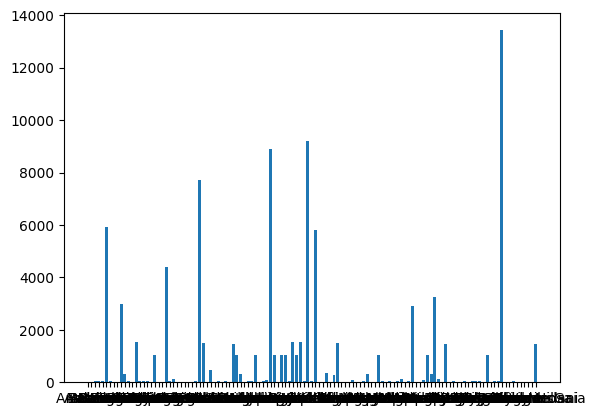

In [14]:
# Visualize city distribtuions
plt.bar(grouped_cities['city'],grouped_cities['Count'])
plt.show()

In [17]:
# Count the number of occurrences for each unique ID
id_counts = data['nct_id'].value_counts()

# Convert the resulting Series back to a DataFrame for better readability
nct_id_counts = id_counts.reset_index()

# Rename the columns for clarity
nct_id_counts.columns = ['nct_id', 'Count']

# Print or use id_counts_df as needed
print(nct_id_counts)


         nct_id  Count
0   NCT06047821  49005
1   NCT04813159  26136
2   NCT05139524  10440
3   NCT05590260   2432
4   NCT05154513   1320
5   NCT05285670    600
6   NCT06085105    216
7   NCT05177393    180
8   NCT04405700    168
9   NCT06046053    150
10  NCT05463380    120
11  NCT05797662    108
12  NCT03855995     98
13  NCT05546242     84
14  NCT05757167     72
15  NCT04633655     60
16  NCT05549726     44
17  NCT05768763     40
18  NCT05862857     24
19  NCT06036238     24
20  NCT05383755     20
21  NCT05599581     18
22  NCT05351606     12
23  NCT05992376      9
24  NCT06165614      8
25  NCT03947190      6
26  NCT04966702      4
27  NCT05882916      4
28  NCT04182126      4
29  NCT06002620      3
30  NCT04938518      2
31  NCT05147519      2


In [67]:
top = 'NCT06047821'
top_id = data[data['nct_id'].str.contains(top, na=False)]
top_id.head(50)

,nct_id,first_date,facility_name,city,investigator,investigator_role,sponsor_name,downcase_name,description
374,NCT06047821,2023-09-12,"icddr,b Dhaka Hospital",Dhaka,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
375,NCT06047821,2023-09-12,Mugda Medical College Hospital,Dhaka,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
376,NCT06047821,2023-09-12,Sir Salimullah Medical College Hospital,Dhaka,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
377,NCT06047821,2023-09-12,Basse Hospital,Basse Santa Su,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
378,NCT06047821,2023-09-12,Gambisara Health Centre (HC),Basse Santa Su,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
379,NCT06047821,2023-09-12,Abidha Health Center,Siaya,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
380,NCT06047821,2023-09-12,Akala Health Center,Siaya,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
381,NCT06047821,2023-09-12,Bar Agulu Health Center,Siaya,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
382,NCT06047821,2023-09-12,Dienya Health Centre,Siaya,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
383,NCT06047821,2023-09-12,Lwak Mission Hospital,Siaya,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."


In [68]:
top_id['city'] = top_id['city'].str.lower()
top_id.head(20)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21064\3958773583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_id['city'] = top_id['city'].str.lower()


,nct_id,first_date,facility_name,city,investigator,investigator_role,sponsor_name,downcase_name,description
374,NCT06047821,2023-09-12,"icddr,b Dhaka Hospital",dhaka,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
375,NCT06047821,2023-09-12,Mugda Medical College Hospital,dhaka,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
376,NCT06047821,2023-09-12,Sir Salimullah Medical College Hospital,dhaka,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
377,NCT06047821,2023-09-12,Basse Hospital,basse santa su,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
378,NCT06047821,2023-09-12,Gambisara Health Centre (HC),basse santa su,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
379,NCT06047821,2023-09-12,Abidha Health Center,siaya,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
380,NCT06047821,2023-09-12,Akala Health Center,siaya,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
381,NCT06047821,2023-09-12,Bar Agulu Health Center,siaya,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
382,NCT06047821,2023-09-12,Dienya Health Centre,siaya,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
383,NCT06047821,2023-09-12,Lwak Mission Hospital,siaya,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."


In [89]:
city = pd.read_csv('county.csv')
city['county'] = city['county'].str.lower()
city.head()


,id,county
0,1,mombasa
1,2,kwale
2,3,kilifi
3,4,tana river
4,5,lamu


In [94]:
city_rows = top_id[top_id['city'].isin(city['county'])]
city_rows.info()
city_rows.head(50)

<class 'pandas.core.frame.DataFrame'>
Index: 13365 entries, 379 to 49371
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nct_id             13365 non-null  object
 1   first_date         13365 non-null  object
 2   facility_name      13365 non-null  object
 3   city               13365 non-null  object
 4   investigator       13365 non-null  object
 5   investigator_role  13365 non-null  object
 6   sponsor_name       13365 non-null  object
 7   downcase_name      13365 non-null  object
 8   description        13365 non-null  object
dtypes: object(9)
memory usage: 1.0+ MB


,nct_id,first_date,facility_name,city,investigator,investigator_role,sponsor_name,downcase_name,description
379,NCT06047821,2023-09-12,Abidha Health Center,siaya,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
380,NCT06047821,2023-09-12,Akala Health Center,siaya,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
381,NCT06047821,2023-09-12,Bar Agulu Health Center,siaya,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
382,NCT06047821,2023-09-12,Dienya Health Centre,siaya,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
383,NCT06047821,2023-09-12,Lwak Mission Hospital,siaya,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
384,NCT06047821,2023-09-12,Ongielo Health Centre,siaya,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
385,NCT06047821,2023-09-12,Siaya County Referral Hospital,siaya,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
386,NCT06047821,2023-09-12,Ting Wangi Health Center,siaya,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
387,NCT06047821,2023-09-12,Wagai Health Center,siaya,"Margaret Kosek, MD",Principal Investigator,Bill and Melinda Gates Foundation,diarrhea,"(29441553,NCT06047821,""In low- and middle-inco..."
412,NCT06047821,2023-09-12,Abidha Health Center,siaya,"Maribel Paredes Olortegui, MPH",Principal Investigator,University of Washington,shigella,"(29441553,NCT06047821,""In low- and middle-inco..."


In [104]:
# city_rows.shape

city_rows['facility_name'].str.count('Dienya Health Centre').sum()

1485

In [105]:
# Group by the counts of each facility in facilities column
grouped_facilities = city_rows.groupby('facility_name').size().reset_index(name='Count')
print(grouped_facilities)

                    facility_name  Count
0            Abidha Health Center   1485
1             Akala Health Center   1485
2         Bar Agulu Health Center   1485
3            Dienya Health Centre   1485
4           Lwak Mission Hospital   1485
5           Ongielo Health Centre   1485
6  Siaya County Referral Hospital   1485
7        Ting Wangi Health Center   1485
8             Wagai Health Center   1485
